In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train['Survived'] = train['Survived'].astype('category')
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')
train['Cabin'] = train['Cabin'].astype('category')

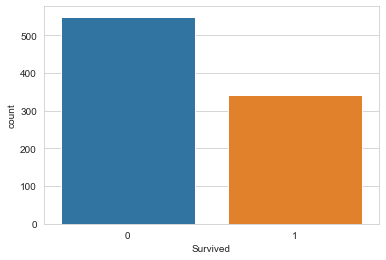

In [8]:
sns.countplot('Survived',data=train)
plt.show()

In [9]:
def basic_details(df):
    df1 = pd.DataFrame()
    df1['Null_Values'] = df.isnull().sum()
    df1['No_Unique_Values'] = df.nunique()
    df1['Data_Type'] = df.dtypes
    return df1

In [10]:
basic_details(train)

,Null_Values,No_Unique_Values,Data_Type
PassengerId,0,891,int64
Survived,0,2,category
Pclass,0,3,int64
Name,0,891,object
Sex,0,2,category
Age,177,88,float64
SibSp,0,7,int64
Parch,0,7,int64
Ticket,0,681,object
Fare,0,248,float64


In [11]:
value = round((train['Age'].isnull().sum())/(train.shape[0])* 100,2)
print(f'Null values in "Age" column with respect to Total data: {value}% \n')
value = round((train['Cabin'].isnull().sum())/(train.shape[0])* 100,2)
print(f'Null values in "Cabin" column with respect to Total data: {value}% \n')
value = round((train['Embarked'].isnull().sum())/(train.shape[0])* 100,2)
print(f'Null values in "Embarked" column with respect to Total data: {value}%')

Null values in "Age" column with respect to Total data: 19.87% 

Null values in "Cabin" column with respect to Total data: 77.1% 

Null values in "Embarked" column with respect to Total data: 0.22%


In [12]:
train['Embarked'].fillna(method='ffill',inplace=True)

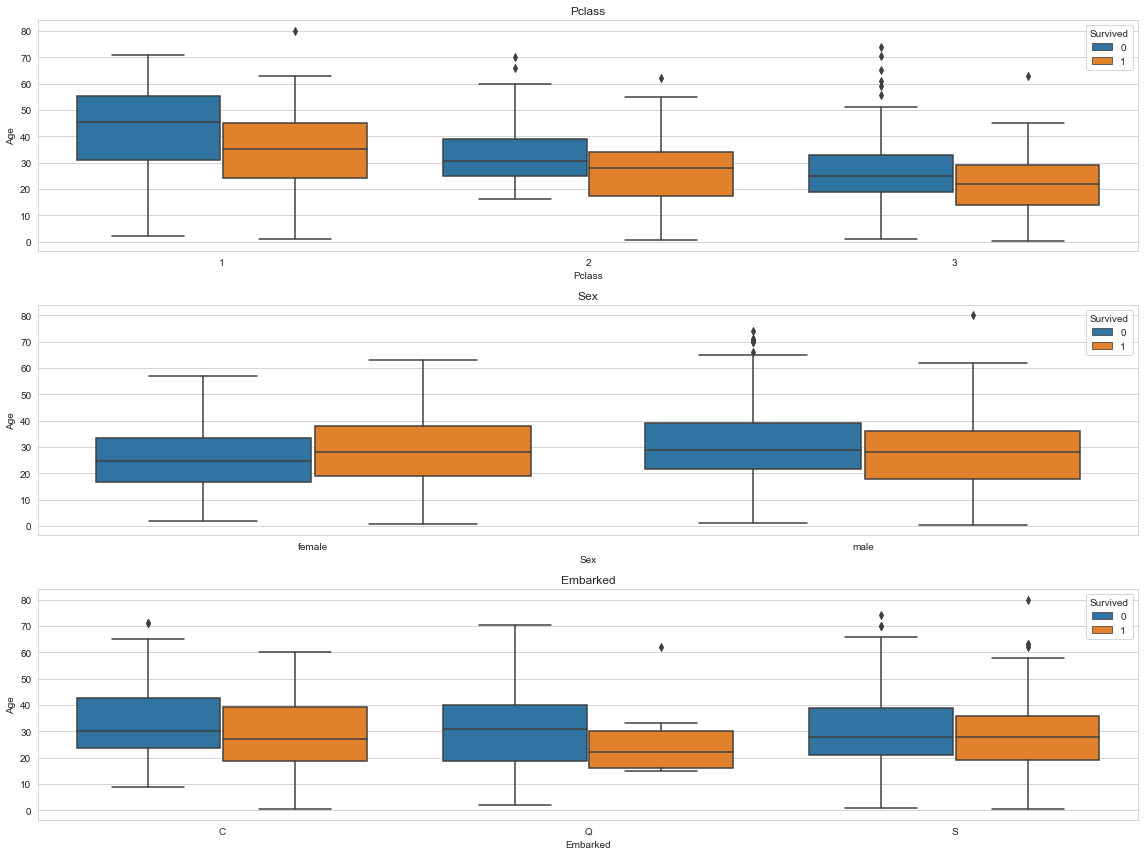

In [13]:
fig, axes = plt.subplots(3, figsize=(16,12))
axes[0].set_title("Pclass")
sns.boxplot(y= 'Age',x='Pclass',data=train,hue='Survived', ax=axes[0])
axes[1].set_title("Sex")
sns.boxplot(y="Age", x= "Sex", data=train,hue='Survived', ax=axes[1])
axes[2].set_title("Embarked")
sns.boxplot(y="Age", x= "Embarked", data=train,hue='Survived', ax=axes[2])
plt.tight_layout()
plt.show()

- For imputing null values in the "Age" column we consider imputing it in accordance with the "Pclass" column

In [14]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).count()

,FareBand,Survived
0,"(-0.001, 7.91]",223
1,"(7.91, 14.454]",224
2,"(14.454, 31.0]",222
3,"(31.0, 512.329]",222


In [15]:
median_1 = train[train['Pclass'] == 1]['Age'].median()
median_2 = train[train['Pclass'] == 2]['Age'].median()
median_3 = train[train['Pclass'] == 3]['Age'].median()
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return median_1
        elif Pclass == 2:
            return median_2
        else:
            return median_3
    else:
        return Age

def Age_group(columns):
    Age = columns[0]
    
    if (Age >= 0) & (Age < 18):
        return 1
    elif (Age >= 18) & (Age < 30):
        return 2
    elif (Age >= 30) & (Age< 50):
        return 3
    elif (Age >= 50) & (Age < 65):
        return 4
    else:
        return 5
    
def fare_group(columns):
    Fare = columns[0]
    if (Fare >= 0) & (Fare < 8):
        return 1
    elif (Fare >= 8) & (Fare < 15):
        return 2
    elif (Fare >= 15) & (Fare < 31):
        return 3
    else:
        return 4

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train['Age_Group'] = train[['Age']].apply(Age_group,axis=1)
train['Fare'] = train[['Fare']].apply(fare_group,axis=1)

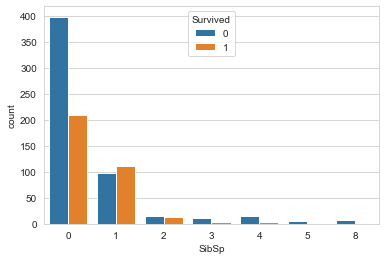

In [17]:
sns.countplot(train['SibSp'],hue=train['Survived'])
plt.show()

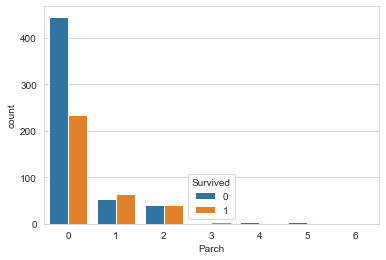

In [18]:
sns.countplot(train['Parch'],hue=train['Survived'])
plt.show()

In [19]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = 0
train.loc[train['Family_Size'] == 1, 'IsAlone'] = 1

In [20]:
train['Age*Class'] = train['Age_Group'] * train['Pclass']

In [21]:
train['Sex'].replace({'male': 1, 'female': 0}, inplace=True)
train_dummy= pd.get_dummies(train['Embarked'],drop_first=True)

In [22]:
train = pd.concat([train,train_dummy],axis=1)

In [23]:
train.drop(columns = ['Cabin','Name','PassengerId','Ticket',
                      'Embarked','SibSp','Parch','Family_Size','FareBand','Age'],inplace=True)

In [24]:
X = train.drop(columns='Survived')
y = train['Survived']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 8)
(623,)
(268, 8)
(268,)


In [25]:
model_logis = LogisticRegression()
model_random = RandomForestClassifier()
model_tree = DecisionTreeClassifier()


model_ = model_logis.fit(x_train,y_train)
model_dtree = model_tree.fit(x_train,y_train)
model_rf  = model_random.fit(x_train,y_train)


In [26]:
y_pred = model_.predict(x_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[133,  24],
       [ 30,  81]], dtype=int64)

In [28]:
accuracy_score(y_test,y_pred)

0.7985074626865671

In [29]:
f1_score(y_test,y_pred)

0.75

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.77      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



### Test Dataset